In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xa4487004c0>,
 'caps': [<matplotlib.lines.Line2D at 0xa448700b20>,
 'boxes': [<matplotlib.lines.Line2D at 0xa4487001f0>],
 'medians': [<matplotlib.lines.Line2D at 0xa448925040>],
 'fliers': [<matplotlib.lines.Line2D at 0xa448925310>],
 'means': []}

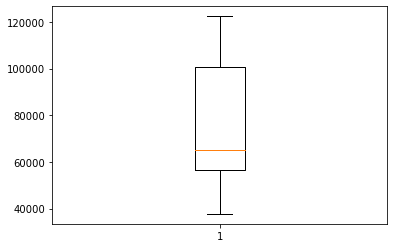

In [7]:
plt.boxplot(df["Salary"])

{'whiskers': [<matplotlib.lines.Line2D at 0xa44909f100>,
 'caps': [<matplotlib.lines.Line2D at 0xa44909f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xa44908edf0>],
 'medians': [<matplotlib.lines.Line2D at 0xa44909fc40>],
 'fliers': [<matplotlib.lines.Line2D at 0xa44909ff10>],
 'means': []}

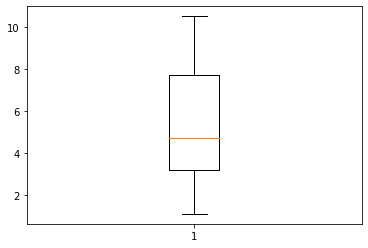

In [8]:
plt.boxplot(df["YearsExperience"])

In [9]:
x= np.array(df["YearsExperience"])

In [10]:
y= df["Salary"]

In [ ]:
plt.scatter(x,y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Relation between YearsExperience & Salary")
plt.legend()
plt.show()

In [ ]:
X = x.reshape(-1,1)

In [ ]:
X.shape

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
y_pred = model.predict(X)

In [ ]:
pd.DataFrame({"Actual":y,"Predicted":y_pred,"Residual":y-y_pred})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
mse

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
r2

In [ ]:
plt.scatter(X,y,label="Actual point",color="green")
plt.scatter(X,y_pred,label="Prediction",color="red")
plt.plot(X,y_pred,label="Prediction",color="blue")

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Relation between YearsExperience & Salary")
plt.legend()
plt.show()